#http://slides.com/profdressel/numpy-and-pandas-overview#/1

In [1]:
import pandas as pd
from sqlalchemy import create_engine # database connection
import datetime as dt
from IPython.display import display

import matplotlib.pyplot as plt
import datetime

In [2]:
# load data form csv file into database
file_name="./598354.csv";
#Initializes database with filename ghcnd.db in the current directory
disk_engine = create_engine('sqlite:///ghcnd.db') 

df=pd.read_csv(file_name, parse_dates=["DATE"]);
df.to_sql('data',disk_engine,if_exists='replace');

In [117]:
# select the total rows
pd.read_sql_query('select count(*) from data;', disk_engine)

,count(*)
0,649206


In [118]:
# select the first 3 rows
pd.read_sql_query('select * from data limit 3;', disk_engine)

,index,STATION,STATION_NAME,DATE,MDPR,DAPR,PRCP,TMAX,TMIN,TOBS
0,0,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-01 00:00:00.000000,-9999,-9999,-9999,217,83,-9999
1,1,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-02 00:00:00.000000,-9999,-9999,-9999,217,72,-9999
2,2,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-03 00:00:00.000000,-9999,-9999,-9999,206,78,-9999


<function matplotlib.pyplot.show>

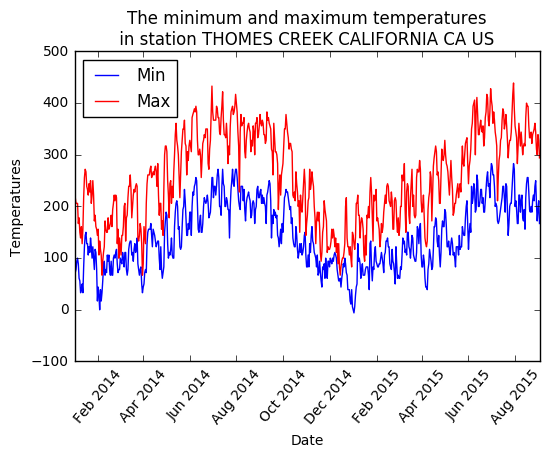

In [119]:
# get the data of station="GHCND:USR0000CTHO"
df=pd.read_sql_query('select date,tmin,tmax from data where station="GHCND:USR0000CTHO" order by date;',disk_engine)

# convert df.DATE, which is string in database, into type date.
X=pd.to_datetime(df.DATE)

Y1=df.TMIN
Y2=df.TMAX

# plot min and max with date as x-axis, min or max value as y-axis
plt.title("The minimum and maximum temperatures\n in station THOMES CREEK CALIFORNIA CA US ")
plt.plot(X,Y1,color="blue", linewidth=1, linestyle="-", label="Min")
plt.plot(X,Y2, color="red", linewidth=1, linestyle="-", label="Max")
plt.legend(loc='upper left')
# x axis date not overlap
plt.xticks(rotation=50)
plt.xlabel('Date')
plt.ylabel('Temperatures')

plt.show

<function matplotlib.pyplot.show>

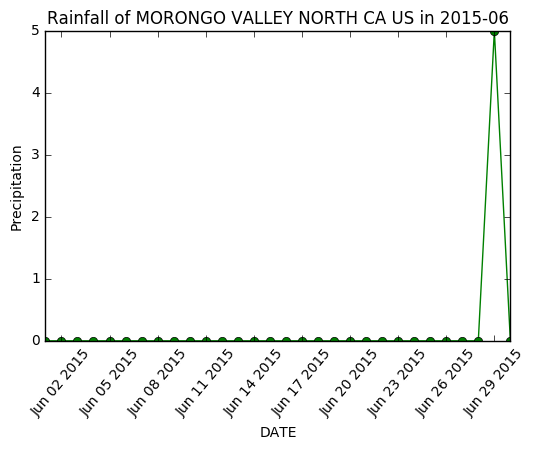

In [120]:
# get the data of station MORONGO VALLEY NORTH CA in June 2015.
df201506=pd.read_sql_query('select date,prcp from data where station="GHCND:USC00045860" and date like "2015-06%" order by date;',disk_engine)
X=pd.to_datetime(df201506.DATE)
Y=df201506.PRCP

# plot 
plt.plot_date(X,Y,color="green", linewidth=1, linestyle="-", label="Max")
plt.title("Rainfall of MORONGO VALLEY NORTH CA US in 2015-06")
plt.xlabel("DATE")
plt.ylabel("Precipitation")
plt.xticks(rotation=50)

plt.show

<function matplotlib.pyplot.show>

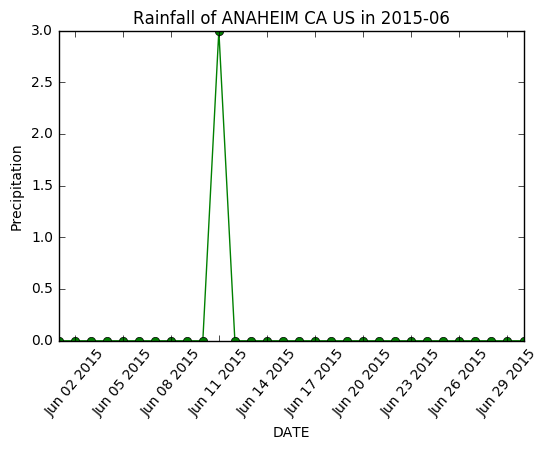

In [121]:
# get the data of stationANAHEIM CA in June 2015.
df201506=pd.read_sql_query('select date,prcp from data where station="GHCND:USC00040192" and date like "2015-06%" order by date;',disk_engine)
X=pd.to_datetime(df201506.DATE)
Y=df201506.PRCP

# plot
plt.plot_date(X,Y,color="green", linewidth=1, linestyle="-", label="Max")
plt.title("Rainfall of ANAHEIM CA US in 2015-06")
plt.xlabel("DATE")
plt.ylabel("Precipitation")
plt.xticks(rotation=50)

plt.show

<function matplotlib.pyplot.show>

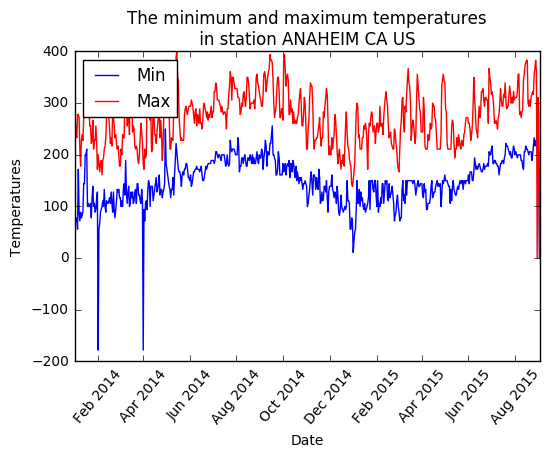

In [18]:
# get the data of station="GHCND:USR0000CTHO"
df=pd.read_sql_query('select date,(case when tmin=\'-9999\' then 0 else tmin end) tmin ,(case when tmax=\'-9999\' then 0 else tmax end) tmax from data where station="GHCND:USC00040192" order by date;',disk_engine)

# convert df.DATE, which is string in database, into type date.
X=pd.to_datetime(df.DATE)

Y1=df.tmin
Y2=df.tmax

# plot min and max with date as x-axis, min or max value as y-axis
plt.title("The minimum and maximum temperatures\n in station ANAHEIM CA US ")
plt.plot(X,Y1,color="blue", linewidth=1, linestyle="-", label="Min")
plt.plot(X,Y2, color="red", linewidth=1, linestyle="-", label="Max")
plt.legend(loc='upper left')
# x axis date not overlap
plt.xticks(rotation=50)
plt.xlabel('Date')
plt.ylabel('Temperatures')

plt.show

**Conclusion**

For station THOMES CREEK, CA,  the temperature of the whole year would be like this, from Janary the temperature start to increase until August it get to the highest, then it will going down until next Janary. The temparature range is between 0 to 400 in most of the time.
For station ANAHEIM, CA, it's temperature is between 100 to 400, but their is also have servral days the minumn temperature very low in Feb and Apr 2014. It maybe an error records, which means the device that gathering these data may be wrong. 

As it's precipitation doesn't be record, so I choose MORONGO VALLEY NORTH and ANAHEIM as the station to get the rainfall in June 2015. From both of the graphs, it's rarely rain during June, and only two days have rain in the whole month of June. 